In [7]:
import pandas as pd
import numpy as np
import lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import ExtraTreesRegressor, HistGradientBoostingRegressor
import sklearn
import matplotlib.pyplot as plt

# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# prepare the cross-validation procedure

# compare different numbers of features selected using mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import LeavePGroupsOut
from sklearn.metrics import mean_squared_error
from scipy import stats



In [67]:
df = pd.read_csv('Dataset/aod-pm2.5-csv/AOD_with_CWV-daily-2019.csv', parse_dates=['From Date'], dayfirst=True)
df['month'] =df['From Date'].dt.month
df['MOYx'] = np.sin(2*np.pi*df['From Date'].dt.dayofyear/12)
df['MOYy'] = np.cos(2*np.pi*df['From Date'].dt.dayofyear/12)
df['WOYx'] = np.sin(2*np.pi*df['From Date'].dt.weekofyear/52)
df['WOYy'] = np.cos(2*np.pi*df['From Date'].dt.weekofyear/52)
df['nAOD47'] = df['AOD47']/(df['ColumnWV'])
df['cardinalday'] = df['From Date'].dt.dayofyear

In [68]:
df2 = pd.read_csv('Dataset/aod-pm2.5-csv/AOD_with_CWV-daily-2020.csv', parse_dates=['From Date'], dayfirst=True)
df2 = df2.drop(columns=['AT'])
df2['month'] =df2['From Date'].dt.month
df2['MOYx'] = np.sin(2*np.pi*df2['From Date'].dt.dayofyear/12)
df2['MOYy'] = np.cos(2*np.pi*df2['From Date'].dt.dayofyear/12)
df2['WOYx'] = np.sin(2*np.pi*df2['From Date'].dt.weekofyear/52)
df2['WOYy'] = np.cos(2*np.pi*df2['From Date'].dt.weekofyear/52)
df2['nAOD47'] = df2['AOD47']/(df2['ColumnWV'])
df2['cardinalday'] = df2['From Date'].dt.dayofyear

In [69]:
df = df.append(df2)
#df.to_csv('final_data_19_20.csv')

In [5]:
df = df[df['PM2.5'].isna()!= True]

In [58]:
vif_data = df.iloc[:,11:30]
vif_data = vif_data[vif_data.isna().any(axis = 1)==False]
#vif_data = vif_data[['NOx', 'SO2', 'CO', 'NH3' ,'AOD47', 'ColumnWV']]
vif_data = vif_data[['BP', 'WS' ,'AOD47', 'ColumnWV']]
vif = pd.DataFrame()
vif["features"] = vif_data.columns
vif["vif_Factor"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
print(vif)

   features  vif_Factor
0        BP        8.00
1        WS        3.16
2     AOD47        2.74
3  ColumnWV        4.86


In [10]:

import datetime
test_size = 0.25

In [57]:

#doi = df[['PM2.5','NOx', 'SO2', 'CO', 'Ozone','NH3' ,'BP', 'AOD47','ColumnWV','latitude', 'longitude']]

doi = df[['PM2.5','NOx', 'SO2', 'CO', 'Ozone','NH3', 'BP','ColumnWV','latitude', 'longitude', 'MOYx', 'MOYy', 'cardinalday']]
doi = doi[doi.isna().any(axis = 1)== False]
y = doi['PM2.5']
x= doi.iloc[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state =123)

clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models.head()


100%|██████████| 42/42 [00:44<00:00,  1.06s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.88,0.88,29.03,0.94
HistGradientBoostingRegressor,0.88,0.88,29.50,2.43
LGBMRegressor,0.87,0.87,30.12,0.49
ExtraTreesRegressor,0.87,0.87,30.83,2.37
RandomForestRegressor,0.85,0.85,32.93,5.00


In [58]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.88,0.88,29.03,0.94
HistGradientBoostingRegressor,0.88,0.88,29.50,2.43
LGBMRegressor,0.87,0.87,30.12,0.49
ExtraTreesRegressor,0.87,0.87,30.83,2.37
RandomForestRegressor,0.85,0.85,32.93,5.00
BaggingRegressor,0.83,0.83,34.50,0.56
GradientBoostingRegressor,0.81,0.81,36.67,1.82
ExtraTreeRegressor,0.71,0.71,45.62,0.04
KNeighborsRegressor,0.70,0.71,46.02,0.38


In [125]:
#doi = df[['PM2.5','RH', 'WS', 'SR', 'BP','AOD47' , 'ColumnWV','latitude', 'longitude', 'DOYx', 'DOYy']]
#LinearRegression	0.46	0.46	61.43
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
df2 = df2.drop(df2[df2['PM2.5']>500].index)
df1 = df[df['season'] == 1]
df2 = df[df['season'] == 2]
df3 = df[df['season'] == 3]

for i in ['AOD47', 'AOD47_3', 'AOD47_5']:
    d = df
    doi = d[['PM2.5',i]]
    doi = doi[doi.isna().any(axis = 1)== False]
    doi = doi.reset_index(drop=True)
    y = doi['PM2.5']
    x= doi.iloc[:, 1:]

    X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state =123)

    clf = LinearRegression()
    m= clf.fit(X_train, y_train)
    sc  = m.score(X_test, y_test)
    pred = m.predict(X_test)
    rmse = mean_squared_error(y_test, pred , squared=False)
    print(sc, rmse)




0.24411869086557725 72.70493490731393
0.24625373300151343 72.60218209016887
0.25036226029223485 72.40404138354545


In [26]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.56,0.56,55.40,0.44
HistGradientBoostingRegressor,0.56,0.56,55.57,2.20
GradientBoostingRegressor,0.54,0.54,56.48,2.19
XGBRegressor,0.54,0.54,56.95,0.96
RandomForestRegressor,0.51,0.51,58.40,8.27
MLPRegressor,0.51,0.51,58.57,37.07
KNeighborsRegressor,0.50,0.50,59.26,0.09
BaggingRegressor,0.49,0.49,59.88,0.43
ExtraTreesRegressor,0.48,0.48,60.32,2.04


In [70]:
from sklearn.ensemble import ExtraTreesRegressor

Initial Features:  ['PM2.5', 'RH', 'WS', 'SR', 'BP', 'AOD47', 'station id', 'ColumnWV', 'latitude', 'longitude']
0
[ 1  2  3  5 11 16 17 20 21 22 24 25 28 29 30 31 33 35 37 38 39 40 26 32]
[10 14 34]
1
[ 1  2  3  5 10 11 14 17 20 21 22 24 25 28 29 30 31 33 34 35 37 38 40 26]
[16 39 32]
2
[ 1  2  3  5 10 11 14 16 20 21 22 24 25 28 29 31 33 34 37 38 39 40 26 32]
[17 30 35]
3
[ 1  2  5 10 11 14 16 17 21 22 24 25 28 29 30 31 33 34 35 37 39 40 26 32]
[ 3 20 38]
4
[ 1  2  3  5 10 14 16 17 20 21 22 24 25 29 30 31 34 35 37 38 39 40 26 32]
[11 28 33]
5
[ 1  2  3  5 10 11 14 16 17 20 21 22 24 25 28 29 30 33 34 35 38 39 40 32]
[31 37 26]
6
[ 1  3  5 10 11 14 16 17 20 22 24 25 28 29 30 31 33 34 35 37 38 39 26 32]
[ 2 21 40]
7
[ 1  2  3  5 10 11 14 16 17 20 21 24 25 28 30 31 33 34 35 37 38 39 40 26
 32]
[22 29]
8
[ 1  2  3  5 10 11 14 16 17 20 21 22 28 29 30 31 33 34 35 37 38 39 40 26
 32]
[24 25]
9
[ 2  3 10 11 14 16 17 20 21 22 24 25 28 29 30 31 33 34 35 37 38 39 40 26
 32]
[1 5]
0.84757925511995

<BarContainer object of 9 artists>

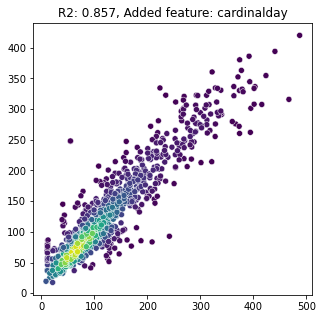

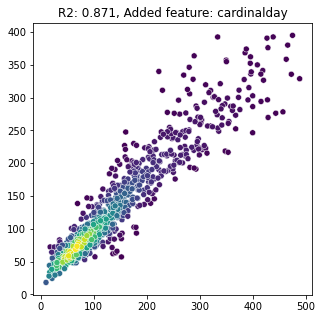

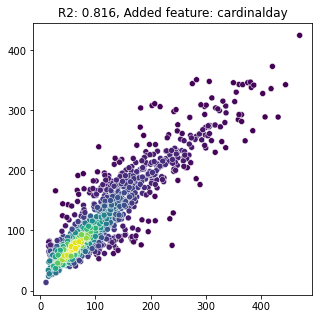

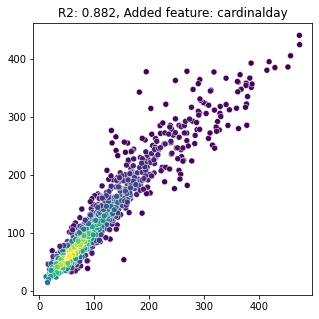

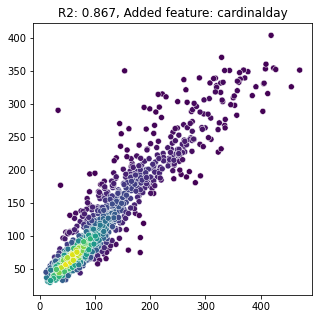

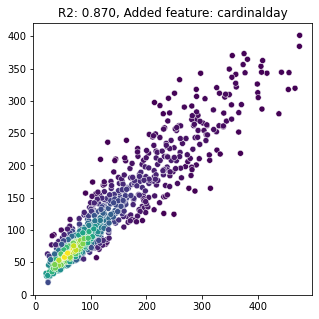

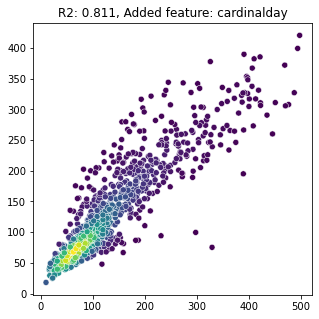

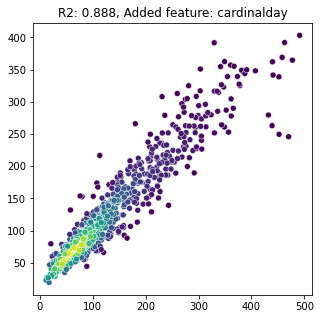

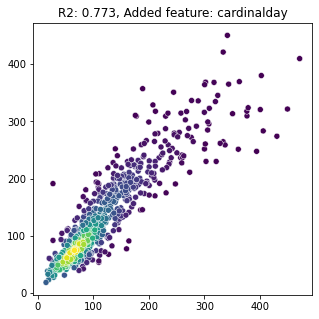

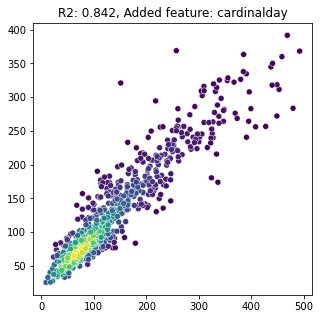

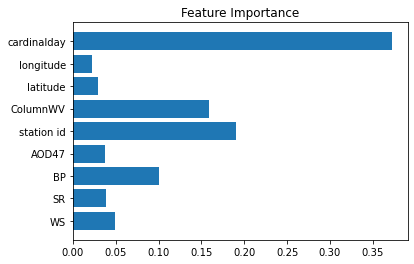

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import LeavePGroupsOut



df = df.drop(df[df['PM2.5']>500].index)
df2 = df2.drop(df2[df2['PM2.5']>500].index)


score = []

# ls = [  'latitude', 'longitude','cardinalday'] 'RH', 'WS', 'SR', 'BP',
# cols = ['PM2.5','NOx', 'SO2', 'CO','NH3']
ls = ['cardinalday']
cols = ['PM2.5' ,'RH', 'WS', 'SR', 'BP','AOD47','station id', 'ColumnWV', 'latitude', 'longitude']
print('Initial Features: ', cols)
for i in ls:
    cols.append(i)

    doi = df[cols]
    doi = doi[doi.isna().any(axis = 1)== False]
    doi = doi.reset_index(drop=True)
    y = doi['PM2.5']
    x= doi.iloc[:, 1:]
    # doi2 = df2[cols]
    # doi2 = doi2[doi2.isna().any(axis = 1)== False]
    # y2 = doi2['PM2.5']
    # x2 = doi2.iloc[:, 1:]
    
    # a,b,c,d = train_test_split(x2, y2,test_size=0.5,random_state =123)
    # X_train, X_test, y_train, y_test = x, a, y, c

    #X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state =123)
    #X_train, X_test, y_train, y_test = x, x2, y, y2

    ########################################################################

    # gs = GroupShuffleSplit(n_splits=10, test_size=0.2, random_state=123)
    # train_ix, test_ix = next(gs.split(df[cols], df['PM2.5'], groups=df['station id']))
    # X_train = x.loc[x.index.intersection(train_ix)]
    # y_train = y.loc[y.index.intersection(train_ix)]

    # X_test = x.loc[x.index.intersection(test_ix)]
    # y_test = y.loc[y.index.intersection(test_ix)]

##############################################################################

    group_kfold = GroupKFold(n_splits=10)
    xx=0
    
    for train_ix, test_ix in group_kfold.split(x, y, x['station id']):
        print(xx)
        
        print(x.loc[x.index.intersection(train_ix)]['station id'].unique())
        print(x.loc[x.index.intersection(test_ix)]['station id'].unique())

        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train = x.loc[x.index.intersection(train_ix)]
        y_train = y.loc[y.index.intersection(train_ix)]

        X_test = x.loc[x.index.intersection(test_ix)]
        y_test = y.loc[y.index.intersection(test_ix)]
        xx+=1
        if(xx==50):
            break

###############################################################################################
        X_train = X_train[X_train.columns.drop('station id')]
        X_test = X_test[X_test.columns.drop('station id')]
        #reg = GradientBoostingRegressor( random_state=50)
        #reg = XGBRegressor( random_state=50)
        reg = ExtraTreesRegressor( random_state=50)
        model = reg.fit(X_train, y_train)
        target = y_test
        pred = model.predict(X_test)

        values = np.vstack([target.to_numpy(),pred])
        kernel = stats.gaussian_kde(values)(values)
        plt.figure(figsize=(5,5))
        plt.title('R2: {:.3f}, Added feature: {}'.format(reg.score(X_test, y_test), i))
        score.append(reg.score(X_test, y_test))
        sns.scatterplot(
            x=target.to_numpy(),
            y=pred,
            c=kernel,
            cmap="viridis"
        )
        # sns.regplot( x=target.to_numpy(),
        #     y=pred)

    print(np.mean(score), score)
lis= []
a = pd.DataFrame(zip(cols[2:], model.feature_importances_), columns = ['Feature', 'Importance'])
plt.figure()
plt.title('Feature Importance')
plt.barh(a['Feature'], a['Importance'])



Initial Features:  ['PM2.5', 'NOx', 'SO2', 'CO', 'NH3', 'AOD47', 'ColumnWV', 'latitude', 'longitude']


<BarContainer object of 9 artists>

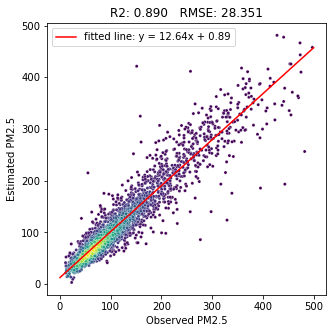

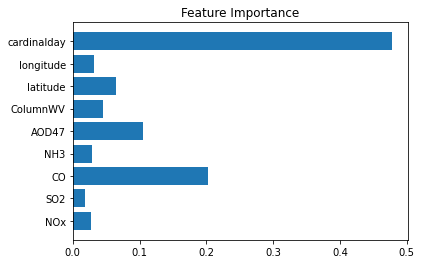

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import LeavePGroupsOut
from sklearn.metrics import mean_squared_error
from scipy import stats




df = df.drop(df[df['PM2.5']>500].index)
df2 = df2.drop(df2[df2['PM2.5']>500].index)
df1 = df[df['season'] == 1]
df2 = df[df['season'] == 2]
df3 = df[df['season'] == 3]
d = df

#, 'latitude', 'longitude', 'cardinalday'

ls = [ 'cardinalday']
cols = ['PM2.5' ,'NOx', 'SO2', 'CO','NH3','AOD47', 'ColumnWV', 'latitude', 'longitude']
#cols = [ 'PM2.5','RH', 'WS', 'SR', 'BP', 'NOx', 'SO2', 'CO','NH3']
print('Initial Features: ', cols)
for i in ls:
    cols.append(i)

    doi = d[cols]
    doi = doi[doi.isna().any(axis = 1)== False]
    doi = doi.reset_index(drop=True)
    y = doi['PM2.5']
    x= doi.iloc[:, 1:]
    # doi2 = df2[cols]
    # doi2 = doi2[doi2.isna().any(axis = 1)== False]
    # y2 = doi2['PM2.5']
    # x2 = doi2.iloc[:, 1:]
    
    # a,b,c,d = train_test_split(x2, y2,test_size=0.5,random_state =123)
    # X_train, X_test, y_train, y_test = x, a, y, c

    X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state =123)

    ########################################################################

    # gs = GroupShuffleSplit(n_splits=10, test_size=0.2, random_state=123)
    # train_ix, test_ix = next(gs.split(df[cols], df['PM2.5'], groups=df['station id']))
    # X_train = x.loc[x.index.intersection(train_ix)]
    # y_train = y.loc[y.index.intersection(train_ix)]

    # X_test = x.loc[x.index.intersection(test_ix)]
    # y_test = y.loc[y.index.intersection(test_ix)]

##############################################################################

    # group_kfold = GroupKFold(n_splits=6)
    # xx=0
    
    # for train_ix, test_ix in group_kfold.split(x, y, x['station id']):
    #     print(xx)
        
    #     print(x.loc[x.index.intersection(train_ix)]['station id'].unique())
    #     print(x.loc[x.index.intersection(test_ix)]['station id'].unique())

    #     # print("TRAIN:", train_index, "TEST:", test_index)
    #     X_train = x.loc[x.index.intersection(train_ix)]
    #     y_train = y.loc[y.index.intersection(train_ix)]

    #     X_test = x.loc[x.index.intersection(test_ix)]
    #     y_test = y.loc[y.index.intersection(test_ix)]
    #     xx+=1
    #     if(xx==10):
    #         break

###############################################################################################
    reg = GradientBoostingRegressor( random_state=50)
    #reg = ExtraTreesRegressor( random_state=50)
    reg = XGBRegressor( random_state=50)
    model = reg.fit(X_train, y_train)
    target = y_test
    pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, pred , squared=False)

    values = np.vstack([target.to_numpy(),pred])
    kernel = stats.gaussian_kde(values)(values)


    plt.figure(figsize=(5,5))
    xx = np.linspace(0,500, 500)
    res = stats.linregress(target, pred)
    plt.plot(xx, res.intercept + res.slope*xx, 'r', label='fitted line: y = {:.2f}x + {:.2f}'.format(res.intercept, res.slope))
    
    
    plt.title('R2: {:.3f}   RMSE: {:.3f}'.format(reg.score(X_test, y_test), rmse))
    sns.scatterplot(
        x=target.to_numpy(),
        y=pred,
        c=kernel,
        cmap="viridis", s = 10
    )
    plt.xlabel('Observed PM2.5')
    plt.ylabel('Estimated PM2.5')
    # sns.regplot( x=target.to_numpy(),
    #     y=pred)
lis= []
a = pd.DataFrame(zip(cols[1:], model.feature_importances_), columns = ['Feature', 'Importance'])
plt.figure()
plt.title('Feature Importance')
plt.barh(a['Feature'], a['Importance'])

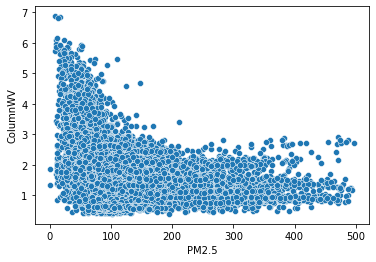

In [104]:
sns.scatterplot(x = df['PM2.5'], y = df['ColumnWV'])

In [15]:
for i in range(12):
    print(df[df['month'] == i]['PM2.5'].std(), i)

nan 0
98.89965499427689 1
50.096549422771844 2
29.437747461249216 3
29.63653630522187 4
39.74833601109125 5
22.70804745595839 6
49.40907126131231 7
11.086256684414595 8
14.351916454870386 9
73.20281011916457 10
118.3112833717139 11


In [16]:
ls = ['BP', 'AOD47', 'ColumnWV','latitude', 'longitude', 'DOYy','DOYx']
cols = ['PM2.5','NOx','SO2', 'Ozone', 'NH3', 'CO' ]
print(model.feature_importances_)
for i in zip(cols[1:], model.feature_importances_):
    print(i)

[0.3140438  0.16904217 0.04660376 0.03544543 0.43486484]
('NOx', 0.31404380160367784)
('SO2', 0.16904217040232575)
('Ozone', 0.04660375664119518)
('NH3', 0.03544543343866813)
('CO', 0.4348648379141332)


Initial Features:  ['PM2.5', 'RH', 'WS', 'SR', 'BP', 'AOD47', 'ColumnWV', 'latitude', 'longitude']
R2: 0.889 (0.006)


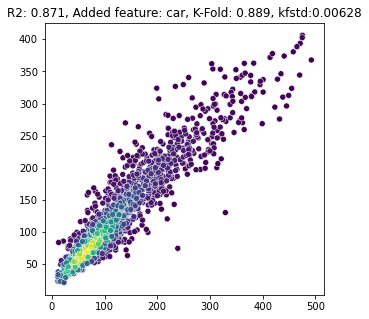

In [67]:
ls = ['cardinalday']
cols = ['PM2.5', 'RH', 'WS', 'SR', 'BP','AOD47', 'ColumnWV','latitude', 'longitude']
#cols = [ 'PM2.5','RH', 'WS', 'SR', 'BP', 'NOx', 'SO2', 'CO','NH3']
print('Initial Features: ', cols)
for i in ls:
    cols.append(i)

    doi = df[cols]

    doi = doi[doi.isna().any(axis = 1)== False]
    y = doi['PM2.5']
    x= doi.iloc[:, 1:]
    cv = KFold(n_splits=10, shuffle=True)
    # create model
    model = XGBRegressor()
    # evaluate model
    scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1)
    # report performance
    print('R2: %.3f (%.3f)' % (mean(scores), std(scores)))
    reg = ExtraTreesRegressor(n_estimators=100, random_state=123)
    X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state =123)
    model = reg.fit(X_train, y_train)
    target = y_test
    pred = model.predict(X_test)

    values = np.vstack([target.to_numpy(),pred])
    kernel = stats.gaussian_kde(values)(values)
    plt.figure(figsize=(5,5))
    plt.title('R2: {:.3}, Added feature: {:.3}, K-Fold: {:.3}, kfstd:{:.3}'.format(reg.score(X_test, y_test), i, mean(scores), std(scores)))
    sns.scatterplot(
        x=target.to_numpy(),
        y=pred,
        c=kernel,
        cmap="viridis"
    )

In [18]:
model.predict([])

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:

cv = KFold(n_splits=10, random_state=123, shuffle=True)
# create model
model = ExtraTreesRegressor()
# evaluate model
scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1)
# report performance
print('R2: %.3f (%.3f)' % (mean(scores), std(scores)))

R2: 0.900 (0.023)


In [ ]:
# doi = df[['PM2.5',  'latitude', 'longitude', 'RH', 'WS', 'SR', 'BP', 'NO2', 'NOx', 'SO2', 'CO', 'Ozone',
#        'NH3', 'AOD47', 'AOD47_3', 'AOD47_5', 'ColumnWV', 'AOD47_3var',
#        'AOD47_5var']]
# doi = doi[doi.isna().any(axis = 1)== False]
# y = doi['PM2.5']
# x= doi.drop(columns = ['PM2.5'])

# # define the evaluation method
# cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)


# # define the pipeline to evaluate
# model = ExtraTreesRegressor()
# fs = SelectKBest(score_func=mutual_info_regression)
# pipeline = Pipeline(steps=[('sel',fs), ('etr', model)])

# # define the grid
# grid = dict()
# grid['sel__k'] = [i for i in range(x.shape[1]-17, x.shape[1]+1)]


# ...
# # define the grid search
# search = GridSearchCV(pipeline, grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# # perform the search
# results = search.fit(x, y)

# # summarize best
# print('Best MAE: %.3f' % results.best_score_)
# print('Best Config: %s' % results.best_params_)
# # summarize all
# means = results.cv_results_['mean_test_score']
# params = results.cv_results_['params']
# features = results.cv_results_['']
# for mean, param in zip(means, params):
#     print(">%.3f with: %r" % (mean, param))

In [6]:
# ls = [  'latitude', 'longitude','cardinalday'] 'RH', 'WS', 'SR', 'BP',
# cols = ['PM2.5','NOx', 'SO2', 'CO','NH3']

df = pd.read_csv('Dataset/aod-pm2.5-csv/AOD_with_CWV-daily-2019.csv', parse_dates=['From Date'], dayfirst=True)
df['month'] =df['From Date'].dt.month
df['MOYx'] = np.sin(2*np.pi*df['From Date'].dt.dayofyear/12)
df['MOYy'] = np.cos(2*np.pi*df['From Date'].dt.dayofyear/12)
df['WOYx'] = np.sin(2*np.pi*df['From Date'].dt.weekofyear/52)
df['WOYy'] = np.cos(2*np.pi*df['From Date'].dt.weekofyear/52)
df['nAOD47'] = df['AOD47']/(df['ColumnWV'])
df['cardinalday'] = df['From Date'].dt.dayofyear

df2 = pd.read_csv('Dataset/aod-pm2.5-csv/AOD_with_CWV-daily-2020.csv', parse_dates=['From Date'], dayfirst=True)
df2 = df2.drop(columns=['AT'])
df2['month'] =df2['From Date'].dt.month
df2['MOYx'] = np.sin(2*np.pi*df2['From Date'].dt.dayofyear/12)
df2['MOYy'] = np.cos(2*np.pi*df2['From Date'].dt.dayofyear/12)
df2['WOYx'] = np.sin(2*np.pi*df2['From Date'].dt.weekofyear/52)
df2['WOYy'] = np.cos(2*np.pi*df2['From Date'].dt.weekofyear/52)
df2['nAOD47'] = df2['AOD47']/(df2['ColumnWV'])
df2['cardinalday'] = df2['From Date'].dt.dayofyear

df = df.append(df2)

df = df.drop(df[df['PM2.5']>500].index)
df2 = df2.drop(df2[df2['PM2.5']>500].index)


ls = ['cardinalday']
cols = ['PM2.5' ,'RH', 'WS', 'SR', 'BP','AOD47','station id', 'ColumnWV', 'latitude', 'longitude',]
reg = GradientBoostingRegressor( random_state=50)
#reg = XGBRegressor( random_state=50)
#reg = ExtraTreesRegressor( random_state=50)

def kfscore( cols, reg, df):
    ls = [1]

    print('Initial Features: ', cols)
    for i in ls:
        score = []

        doi = df[cols]
        doi = doi[doi.isna().any(axis = 1)== False]
        doi = doi.reset_index(drop=True)
        y = doi['PM2.5']
        x= doi.iloc[:, 1:]
        # doi2 = df2[cols]
        # doi2 = doi2[doi2.isna().any(axis = 1)== False]
        # y2 = doi2['PM2.5']
        # x2 = doi2.iloc[:, 1:]
        
        # a,b,c,d = train_test_split(x2, y2,test_size=0.5,random_state =123)
        # X_train, X_test, y_train, y_test = x, a, y, c

        #X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state =123)
        #X_train, X_test, y_train, y_test = x, x2, y, y2

        ########################################################################

        # gs = GroupShuffleSplit(n_splits=10, test_size=0.2, random_state=123)
        # train_ix, test_ix = next(gs.split(df[cols], df['PM2.5'], groups=df['station id']))
        # X_train = x.loc[x.index.intersection(train_ix)]
        # y_train = y.loc[y.index.intersection(train_ix)]

        # X_test = x.loc[x.index.intersection(test_ix)]
        # y_test = y.loc[y.index.intersection(test_ix)]

    ##############################################################################

        group_kfold = GroupKFold(n_splits=10)
        xx=0
        
        for train_ix, test_ix in group_kfold.split(x, y, x['station id']):
            # print(xx)
            
            # print(x.loc[x.index.intersection(train_ix)]['station id'].unique())
            # print(x.loc[x.index.intersection(test_ix)]['station id'].unique())

            # print("TRAIN:", train_index, "TEST:", test_index)
            X_train = x.loc[x.index.intersection(train_ix)]
            y_train = y.loc[y.index.intersection(train_ix)]

            X_test = x.loc[x.index.intersection(test_ix)]
            y_test = y.loc[y.index.intersection(test_ix)]
            xx+=1
            if(xx==50):
                break

    ###############################################################################################
            X_train = X_train[X_train.columns.drop('station id')]
            X_test = X_test[X_test.columns.drop('station id')]
            model = reg.fit(X_train, y_train)
            target = y_test
            pred = model.predict(X_test)

            values = np.vstack([target.to_numpy(),pred])
            kernel = stats.gaussian_kde(values)(values)
            # plt.figure(figsize=(5,5))
            # plt.title('R2: {:.3f}, Added feature: {}'.format(reg.score(X_test, y_test), i))
            score.append(reg.score(X_test, y_test))
            # sns.scatterplot(
            #     x=target.to_numpy(),
            #     y=pred,
            #     c=kernel,
            #     cmap="viridis"
            # )
            # sns.regplot( x=target.to_numpy(),
            #     y=pred)
        print(np.mean(score))
    lis= []
    # a = pd.DataFrame(zip(cols[2:], model.feature_importances_), columns = ['Feature', 'Importance'])
    # plt.figure()
    # plt.title('Feature Importance')
    # plt.barh(a['Feature'], a['Importance'])

sat1 = ['PM2.5', 'station id', 'AOD47_5']
sat2 = ['ColumnWV']
meteor = ['RH', 'WS', 'SR', 'BP']
gas = ['NOx','SO2', 'NH3', 'CO']
extra = ['latitude', 'longitude', 'cardinalday']
cols = ['PM2.5' ,'RH', 'WS', 'SR', 'BP','AOD47','station id', 'ColumnWV', 'latitude', 'longitude']
reg1 = GradientBoostingRegressor( random_state=50)
reg2 = XGBRegressor( random_state=50)
reg3 = ExtraTreesRegressor( random_state=50)
regs = [reg1, reg2, reg3]

def kfscoreitr(regs):
    for i in regs:
        print(i)

        cols = sat1
        kfscore(cols, i , df)

        cols = sat1 + sat2
        kfscore(cols, i , df)

        cols = sat1 + sat2 + meteor
        kfscore(cols, i , df)

        cols = sat1 + sat2 + gas
        kfscore(cols, i , df)

        cols = sat1 + sat2 + meteor + extra
        kfscore(cols, i , df)

        cols = sat1 + sat2 + gas + extra
        kfscore(cols, i , df)

kfscoreitr(regs)

GradientBoostingRegressor(random_state=50)
Initial Features:  ['PM2.5', 'station id', 'AOD47_5']


NameError: name 'GroupKFold' is not defined

GradientBoostingRegressor(random_state=50)
Initial Features:  ['PM2.5', 'station id', 'AOD47']
0.2807881728961885
70.91947254841777
Initial Features:  ['PM2.5', 'station id', 'AOD47', 'ColumnWV']
0.565557534386836
55.119240102886266
Initial Features:  ['PM2.5', 'station id', 'AOD47', 'ColumnWV', 'RH', 'WS', 'SR', 'BP']
0.6465213421289098
49.69760178452992
Initial Features:  ['PM2.5', 'station id', 'AOD47', 'ColumnWV', 'NOx', 'SO2', 'NH3', 'CO']
0.7287639869257683
44.530117770851284
Initial Features:  ['PM2.5', 'station id', 'AOD47', 'ColumnWV', 'RH', 'WS', 'SR', 'BP', 'latitude', 'longitude', 'cardinalday']
0.7958789602631091
37.765715670078976
Initial Features:  ['PM2.5', 'station id', 'AOD47', 'ColumnWV', 'NOx', 'SO2', 'NH3', 'CO', 'latitude', 'longitude', 'cardinalday']
0.8411140520581849
34.08183051512207
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, g

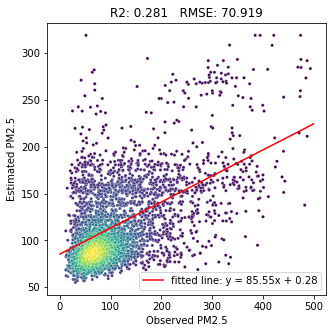

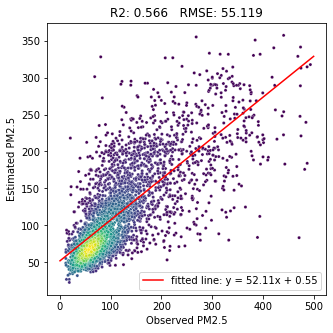

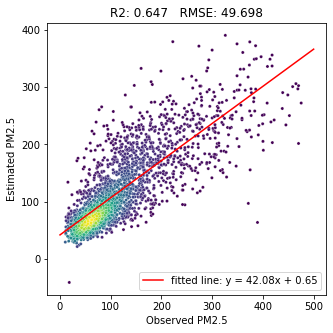

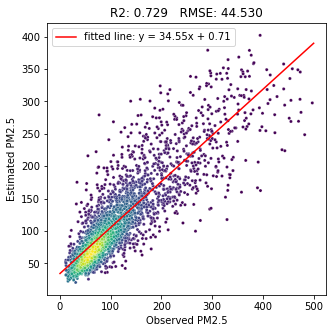

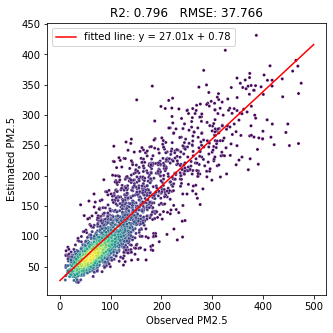

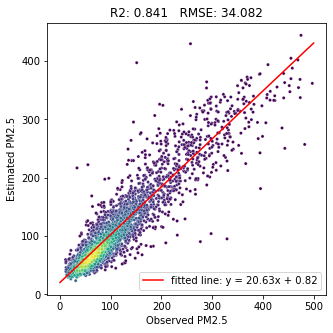

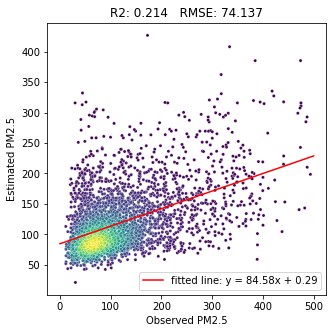

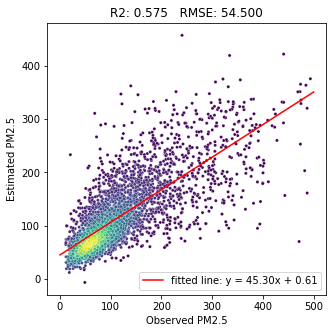

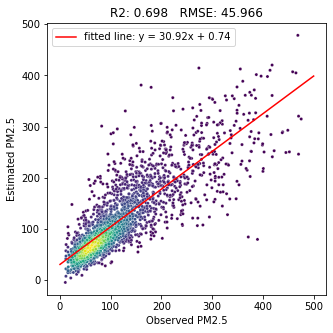

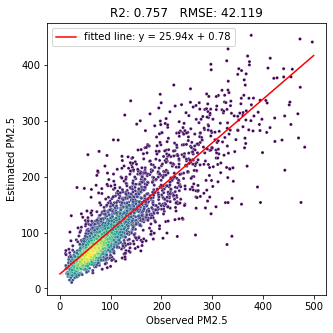

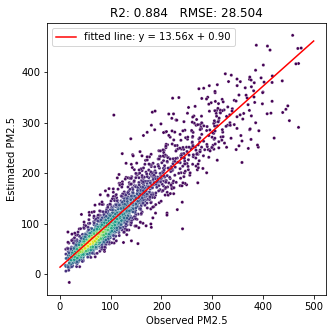

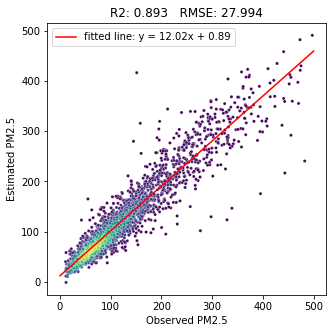

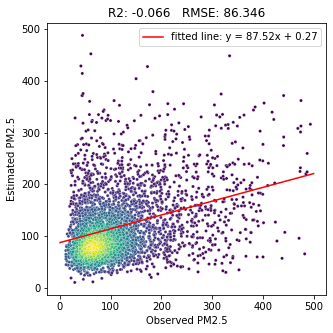

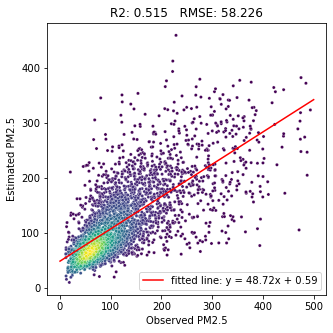

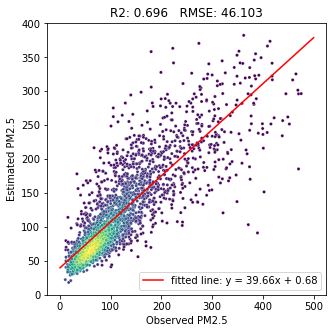

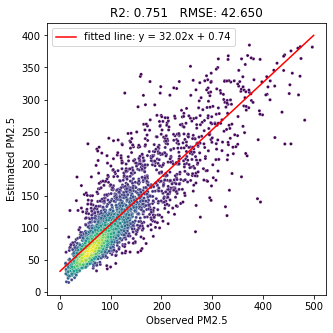

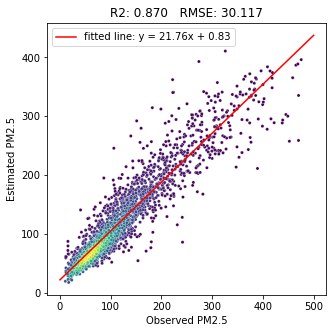

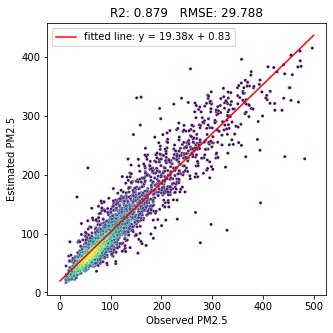

In [8]:
# ls = [  'latitude', 'longitude','cardinalday'] 'RH', 'WS', 'SR', 'BP',
# cols = ['PM2.5','NOx', 'SO2', 'CO','NH3']

df = pd.read_csv('Dataset/aod-pm2.5-csv/AOD_with_CWV-daily-2019.csv', parse_dates=['From Date'], dayfirst=True)
df['month'] =df['From Date'].dt.month
df['MOYx'] = np.sin(2*np.pi*df['From Date'].dt.dayofyear/12)
df['MOYy'] = np.cos(2*np.pi*df['From Date'].dt.dayofyear/12)
df['WOYx'] = np.sin(2*np.pi*df['From Date'].dt.weekofyear/52)
df['WOYy'] = np.cos(2*np.pi*df['From Date'].dt.weekofyear/52)
df['nAOD47'] = df['AOD47']/(df['ColumnWV'])
df['cardinalday'] = df['From Date'].dt.dayofyear

df2 = pd.read_csv('Dataset/aod-pm2.5-csv/AOD_with_CWV-daily-2020.csv', parse_dates=['From Date'], dayfirst=True)
df2 = df2.drop(columns=['AT'])
df2['month'] =df2['From Date'].dt.month
df2['MOYx'] = np.sin(2*np.pi*df2['From Date'].dt.dayofyear/12)
df2['MOYy'] = np.cos(2*np.pi*df2['From Date'].dt.dayofyear/12)
df2['WOYx'] = np.sin(2*np.pi*df2['From Date'].dt.weekofyear/52)
df2['WOYy'] = np.cos(2*np.pi*df2['From Date'].dt.weekofyear/52)
df2['nAOD47'] = df2['AOD47']/(df2['ColumnWV'])
df2['cardinalday'] = df2['From Date'].dt.dayofyear

df = df.append(df2)

df = df.drop(df[df['PM2.5']>500].index)
df2 = df2.drop(df2[df2['PM2.5']>500].index)


ls = ['cardinalday']
cols = ['PM2.5' ,'RH', 'WS', 'SR', 'BP','AOD47','station id', 'ColumnWV', 'latitude', 'longitude',]

def r2score( cols, reg, df):
    ls = [1]

    print('Initial Features: ', cols)
    for i in ls:

        doi = df[cols]
        doi = doi[doi.isna().any(axis = 1)== False]
        doi = doi.reset_index(drop=True)
        y = doi['PM2.5']
        x= doi.iloc[:, 1:]
        # doi2 = df2[cols]
        # doi2 = doi2[doi2.isna().any(axis = 1)== False]
        # y2 = doi2['PM2.5']
        # x2 = doi2.iloc[:, 1:]
        
        # a,b,c,d = train_test_split(x2, y2,test_size=0.5,random_state =123)
        # X_train, X_test, y_train, y_test = x, a, y, c

        X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state =123)

        ########################################################################

        model = reg.fit(X_train, y_train)
        target = y_test
        pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, pred , squared=False)

        values = np.vstack([target.to_numpy(),pred])
        kernel = stats.gaussian_kde(values)(values)


        plt.figure(figsize=(5,5))
        xx = np.linspace(0,500, 500)
        res = stats.linregress(target, pred)
        plt.plot(xx, res.intercept + res.slope*xx, 'r', label='fitted line: y = {:.2f}x + {:.2f}'.format(res.intercept, res.slope))
        
        
        plt.title('R2: {:.3f}   RMSE: {:.3f}'.format(reg.score(X_test, y_test), rmse))
        print(reg.score(X_test, y_test) )
        print(rmse)
        sns.scatterplot(
            x=target.to_numpy(),
            y=pred,
            c=kernel,
            cmap="viridis", s = 10
        )
        plt.xlabel('Observed PM2.5')
        plt.ylabel('Estimated PM2.5')
        # sns.regplot( x=target.to_numpy(),
        #     y=pred)
lis= []
# a = pd.DataFrame(zip(cols[1:], model.feature_importances_), columns = ['Feature', 'Importance'])
# plt.figure()
# plt.title('Feature Importance')
# plt.barh(a['Feature'], a['Importance'])

sat1 = ['PM2.5', 'station id', 'AOD47']
sat2 = ['ColumnWV']
meteor = ['RH', 'WS', 'SR', 'BP']
gas = ['NOx','SO2', 'NH3', 'CO']
extra = ['latitude', 'longitude', 'cardinalday']
cols = ['PM2.5' ,'RH', 'WS', 'SR', 'BP','AOD47_5','station id', 'ColumnWV', 'latitude', 'longitude']
reg1 = GradientBoostingRegressor( random_state=50)
reg2 = XGBRegressor( random_state=50)
reg3 = ExtraTreesRegressor( random_state=50)
regs = [reg1, reg2, reg3]

def r2scoreitr(regs):
    for i in regs:
        print(i)

        cols = sat1
        r2score(cols, i , df)

        cols = sat1 + sat2
        r2score(cols, i , df)

        cols = sat1 + sat2 + meteor
        r2score(cols, i , df)

        cols = sat1 + sat2 + gas
        r2score(cols, i , df)

        cols = sat1 + sat2 + meteor + extra
        r2score(cols, i , df)

        cols = sat1 + sat2 + gas + extra
        r2score(cols, i , df)

r2scoreitr(regs)